# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [34]:
 !pip install sweetviz 
#uncomment the above if you need to install the library 
 !pip install auto-sklearn
    
#uncomment the above if you need to install the library 

In [35]:
# !pip install --upgrade scipy

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [37]:
train = pd.read_csv('/kaggle/input/standard-bank-Forage/train.csv')
test = pd.read_csv('/kaggle/input/standard-bank-Forage/test.csv')

In [38]:

train.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

# Part One

## EDA

In [39]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [40]:
test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [41]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [42]:
df.shape
print(train.shape)


(614, 13)


### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


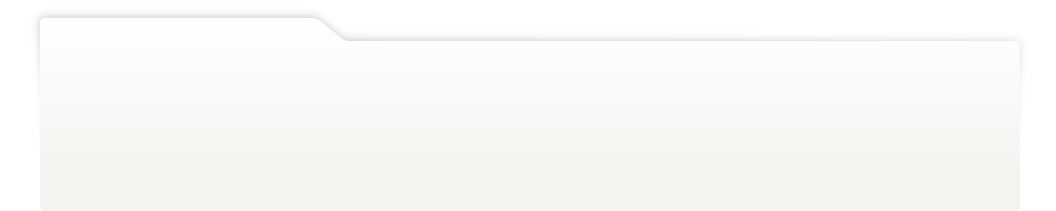
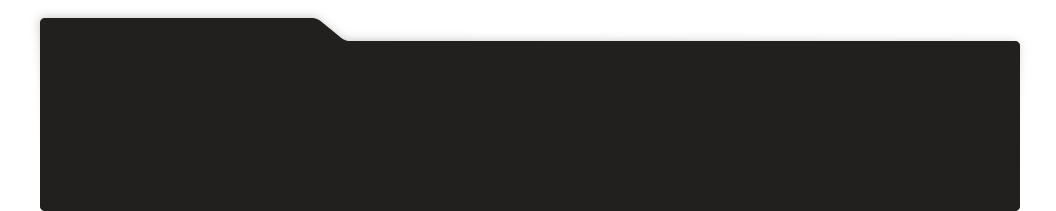
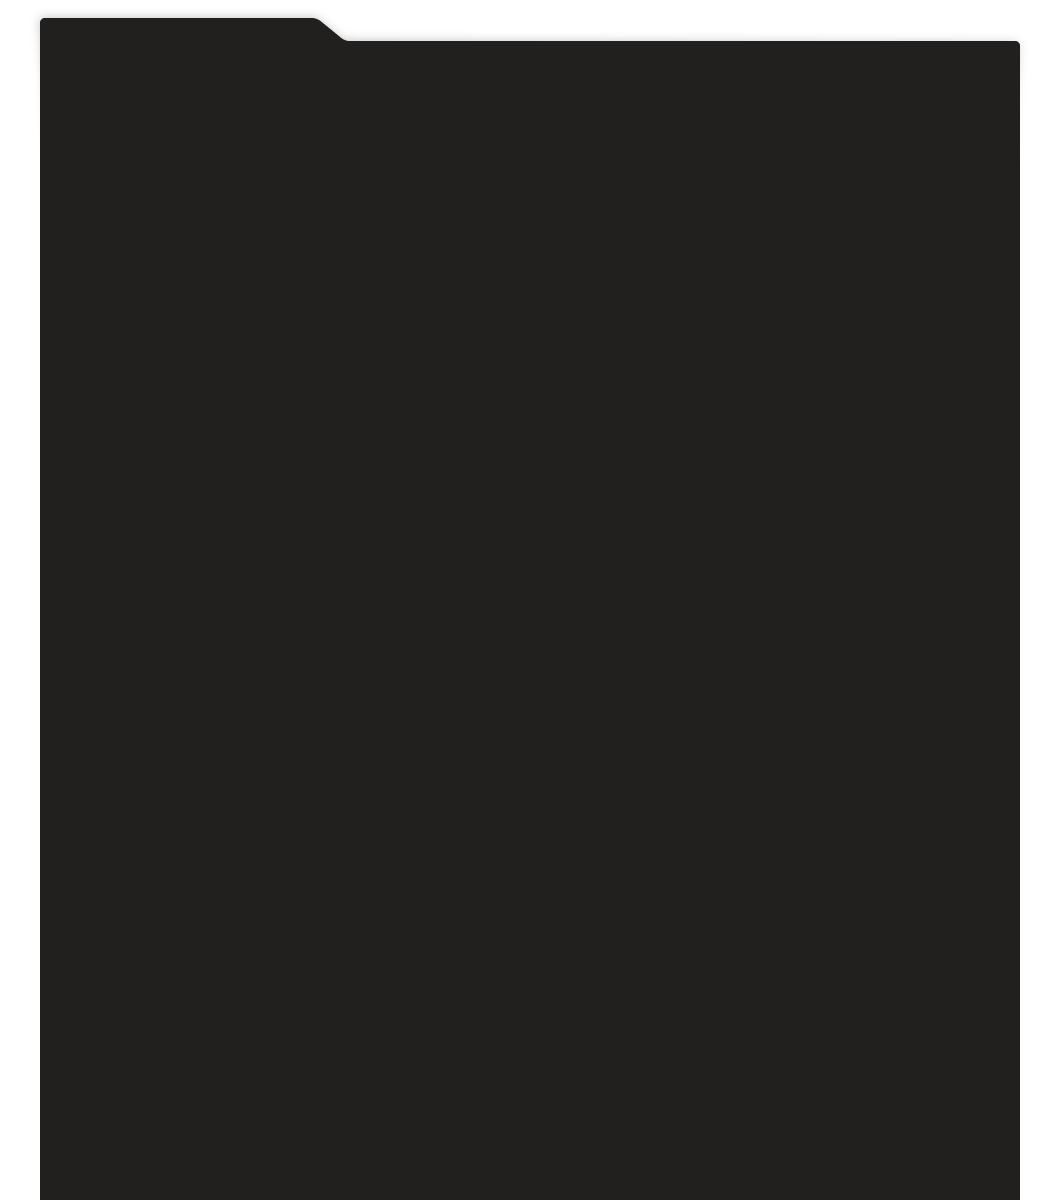
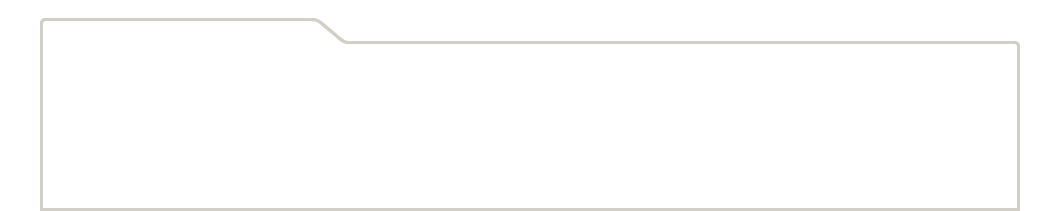
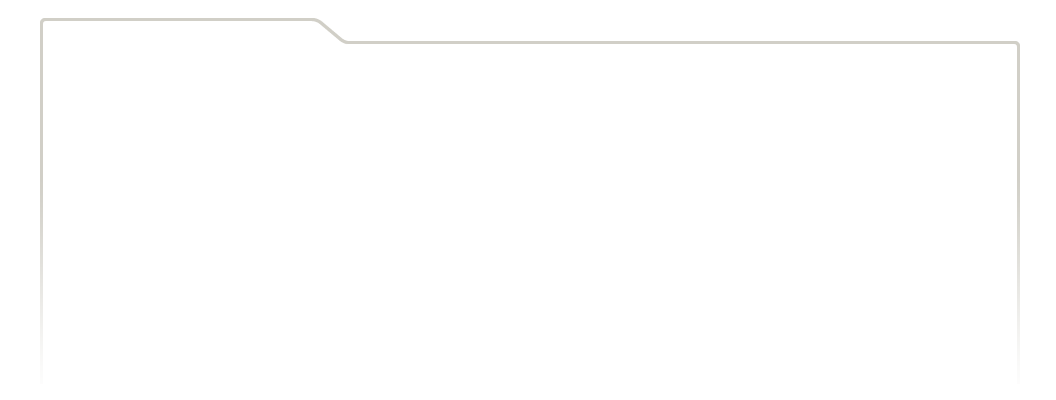
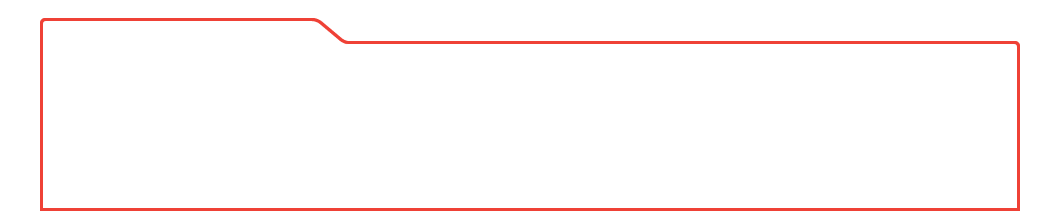
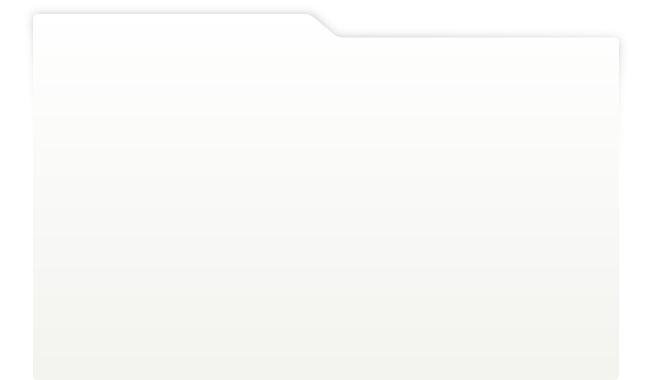
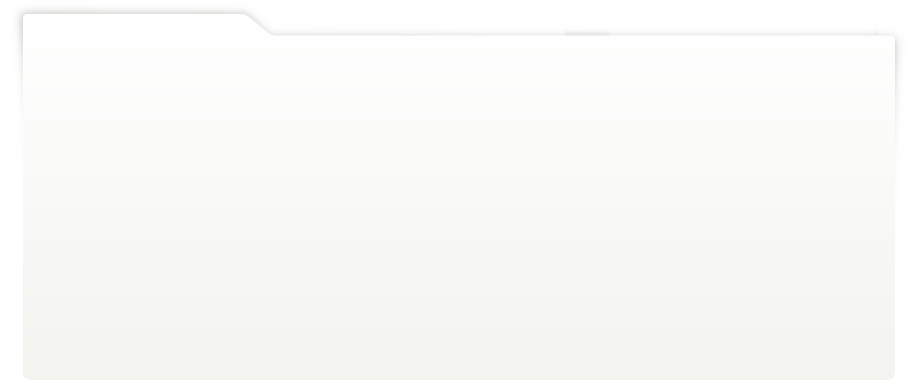
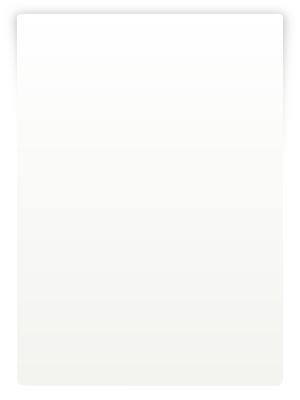
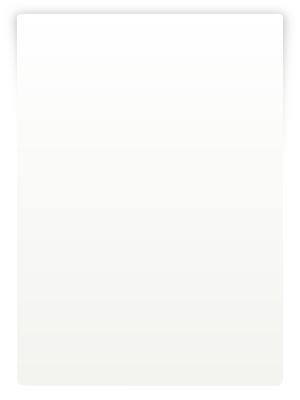
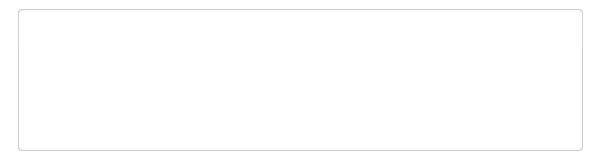
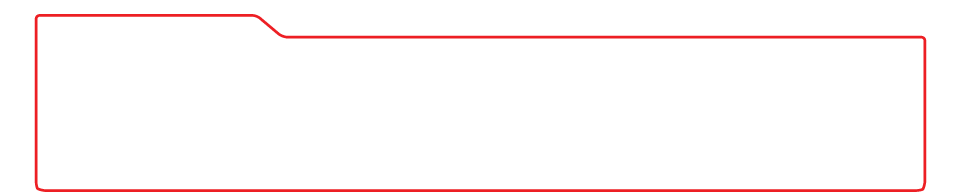
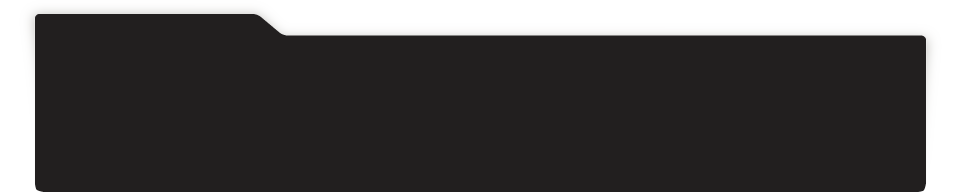
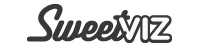
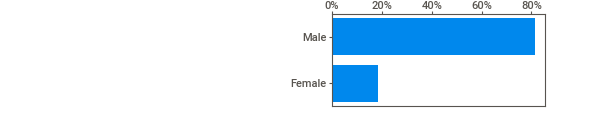
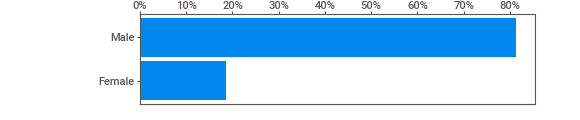
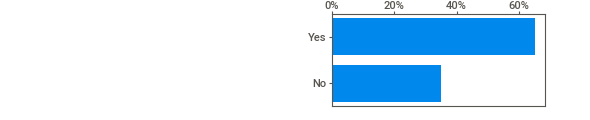
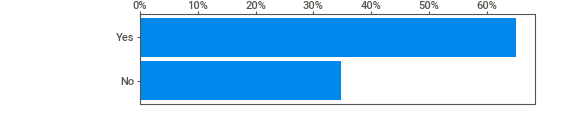
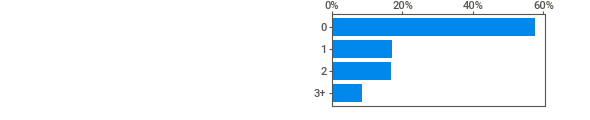
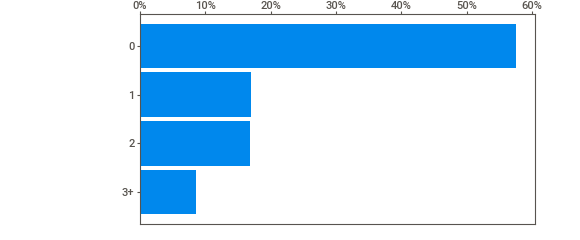
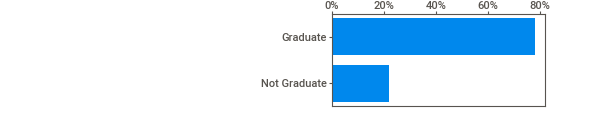
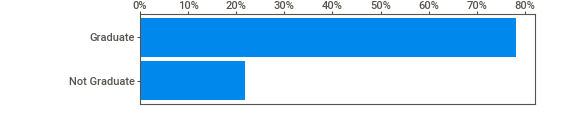
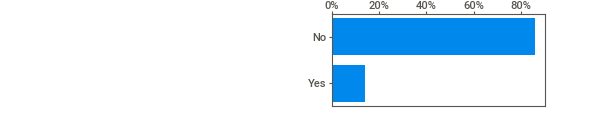
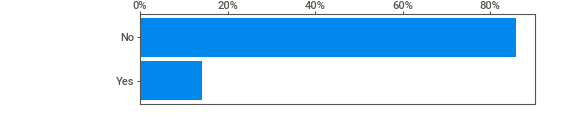
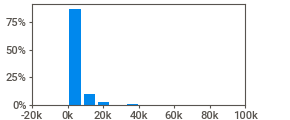
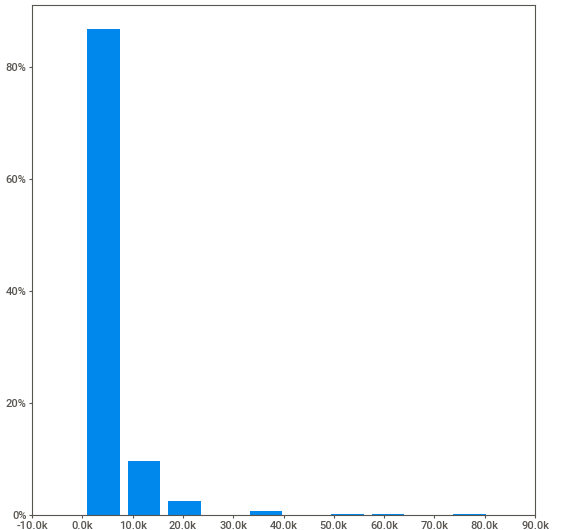
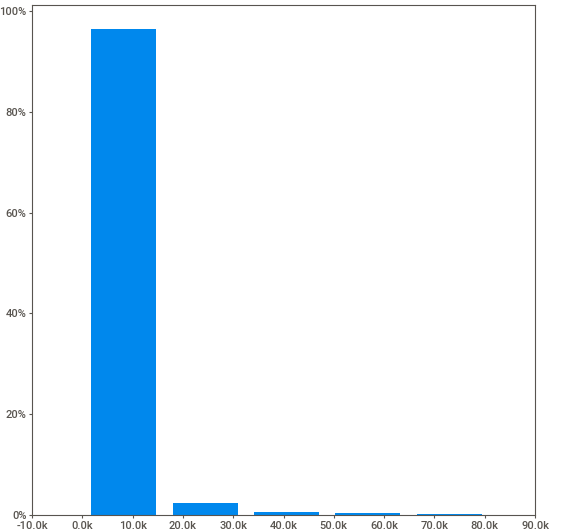
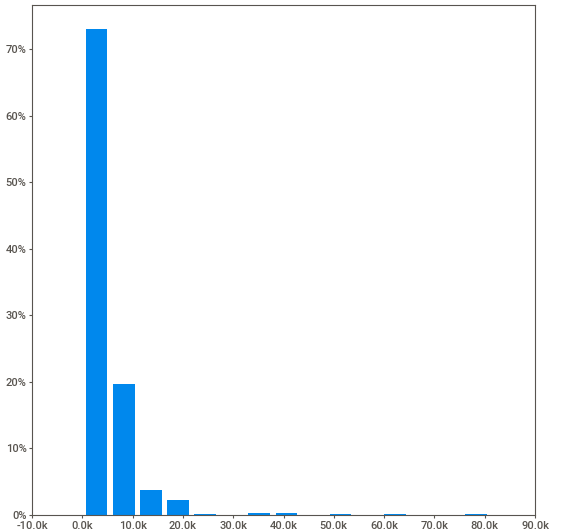
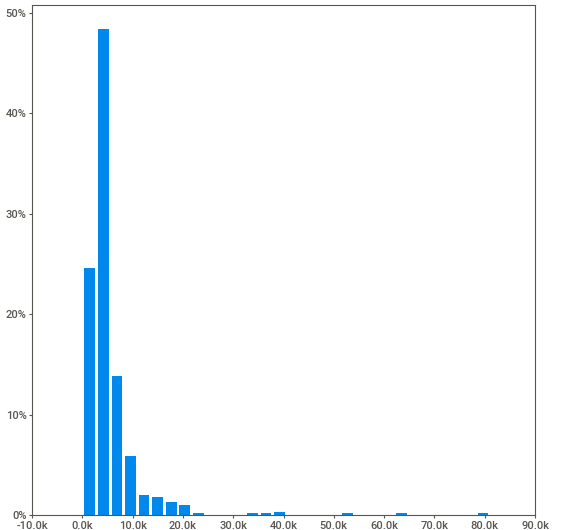
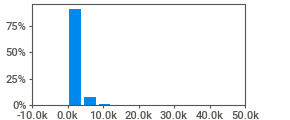
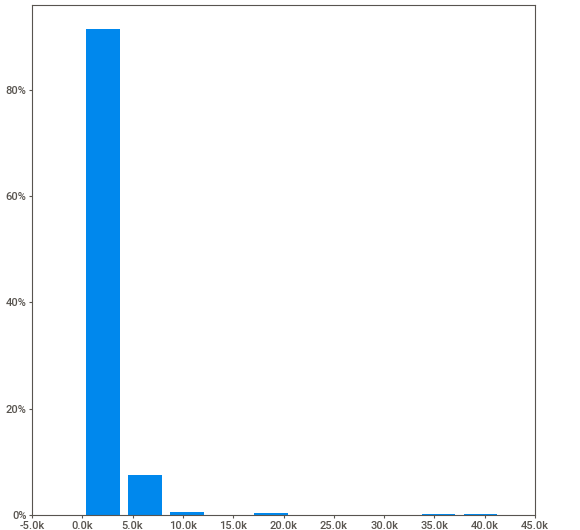
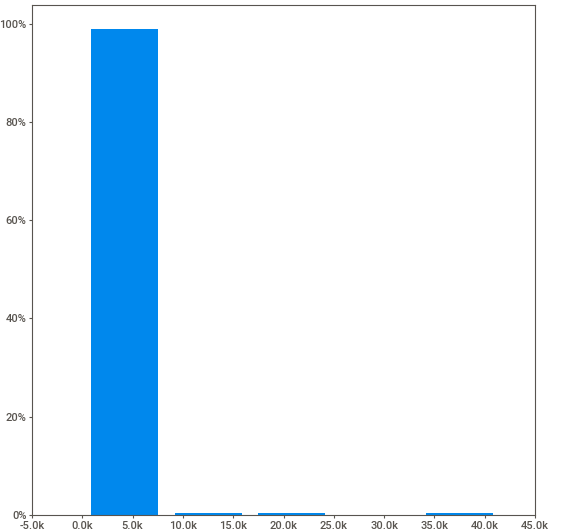
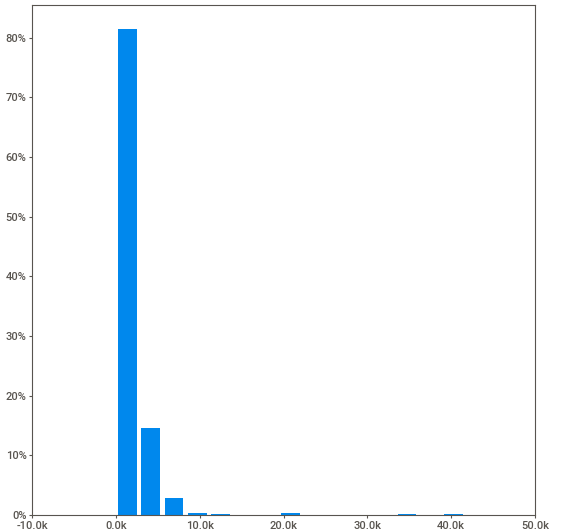
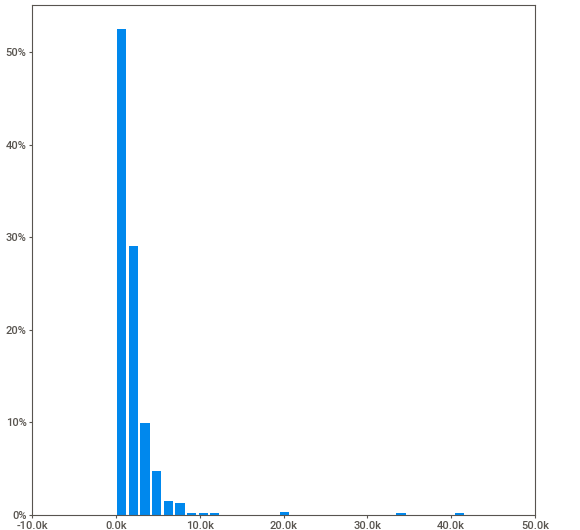
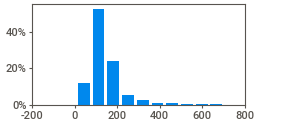
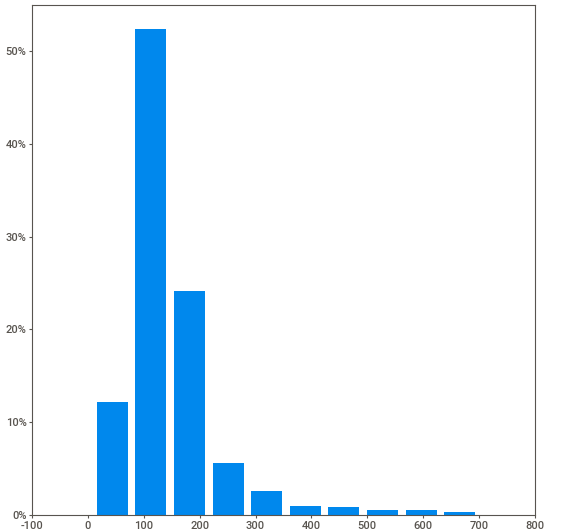
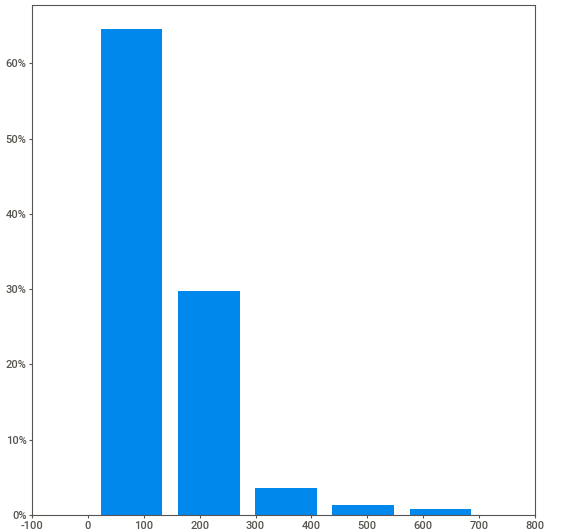
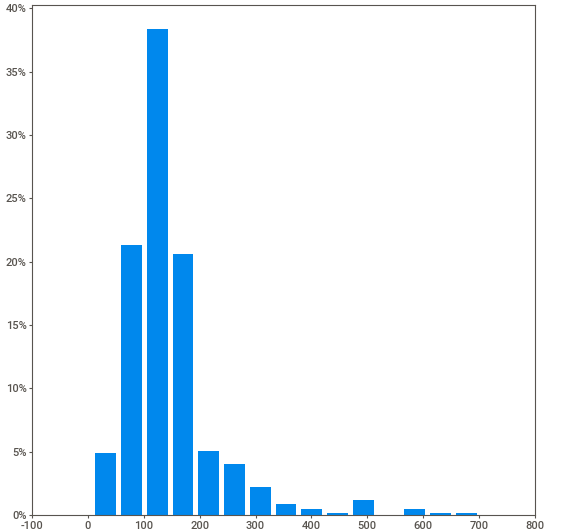
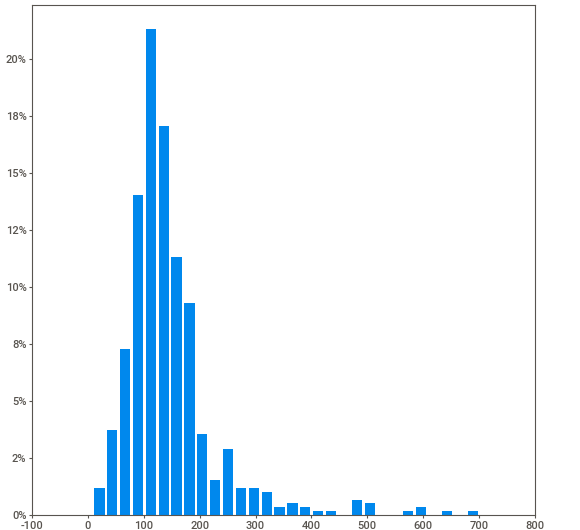
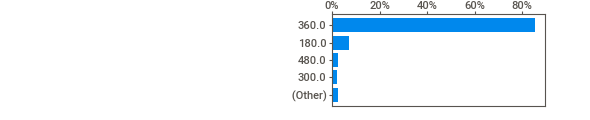
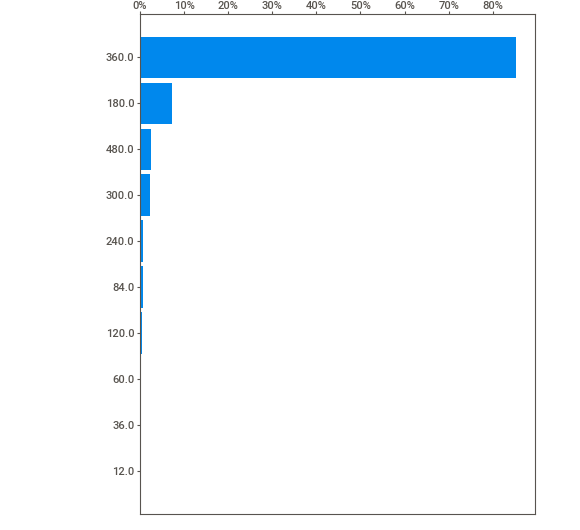
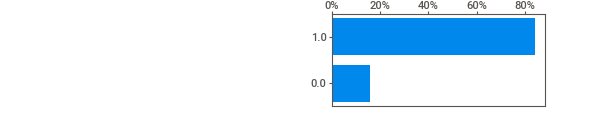
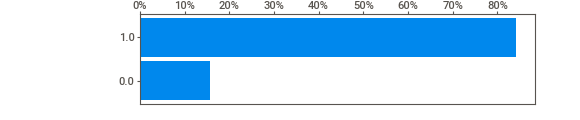
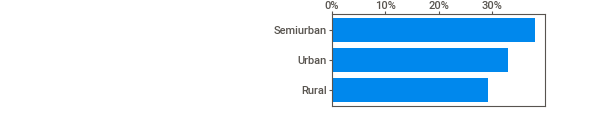
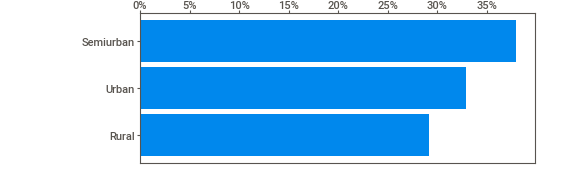
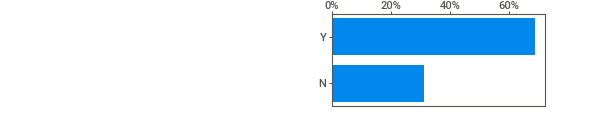
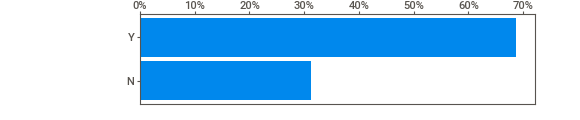
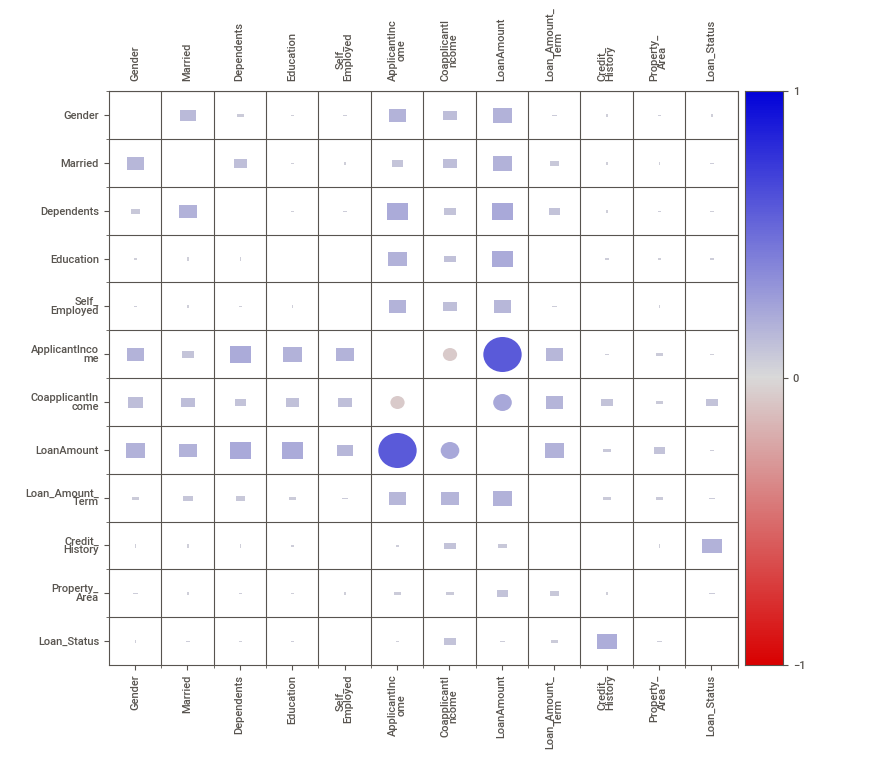
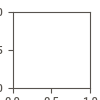

In [43]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Your Own EDA 


An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

How do the the loan statuses compare? i.e. what is the distrubition of each?

How do women and men compare when it comes to defaulting on loans in the historical dataset?

How many of the loan applicants have dependents based on the historical dataset?

How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

Are applicants with a credit history more likely to default than those who do not have one?

Is there a correlation between the applicant's income and the loan amount they applied for?

# 1 

In [44]:
print('For train dataset ')
print('number of rows =',train.shape[0])
print('number of features =',train.shape[1])
print('*-'*30)
print('For test dataset ')
print('number of rows =',test.shape[0])
print('number of features =',test.shape[1])
print('*-'*30)

print('datatypes for train dataset')
print('datatype of train dataset')
print(train.dtypes)
print('*-'*30)
print('datatypes for test dataset')
print(test.dtypes)

For train dataset 
number of rows = 614
number of features = 13
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
For test dataset 
number of rows = 367
number of features = 12
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
datatypes for train dataset
datatype of train dataset
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
datatypes for test dataset
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantInco

LOAN STATUS feature is eccluded from the test dataset 

# 2

In [45]:
print("duplicates in train")
print(train.duplicated().sum())
print("duplicates in test")
print(test.duplicated().sum())
print('*-'*20)

print('missing perentages')
a=train.isna().sum()/train.shape[0]*100
print(a.sort_values(ascending=False))


duplicates in train
0
duplicates in test
0
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
missing perentages
Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_ID              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


# 3

<AxesSubplot:>

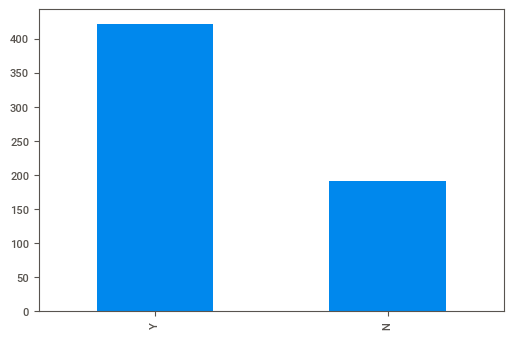

In [46]:
train.Loan_Status.value_counts().plot.bar()

# 4

<AxesSubplot:>

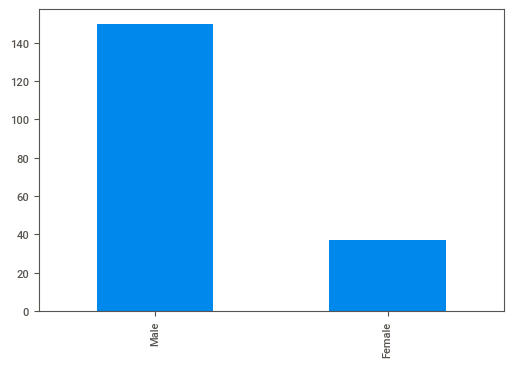

In [47]:
train[train.Loan_Status=='N'].Gender.value_counts().plot.bar()

# 5

<AxesSubplot:>

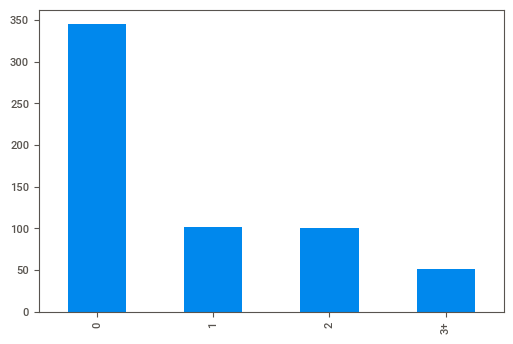

In [48]:
train.Dependents.value_counts().plot.bar()

# 6

In [49]:
print(train[train.Self_Employed=='Yes'].ApplicantIncome)
print(train[train.Self_Employed=='No'].ApplicantIncome)

2       3000
5       5417
25      9560
32      4692
44      4695
       ...  
592     9357
594    16120
596     6383
598     9963
613     4583
Name: ApplicantIncome, Length: 82, dtype: int64
0      5849
1      4583
3      2583
4      6000
6      2333
       ... 
608    3232
609    2900
610    4106
611    8072
612    7583
Name: ApplicantIncome, Length: 500, dtype: int64


<Figure size 17000x17000 with 0 Axes>

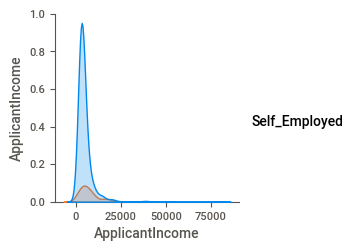

In [50]:
import seaborn as sns
fig = plt.figure(figsize=(170,170))
sns.pairplot(train.drop(columns=['Married','Gender','Dependents','Education','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']), hue='Self_Employed')
plt.show()

# 7

<Figure size 17000x17000 with 0 Axes>

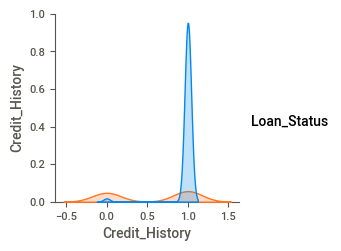

In [51]:
fig = plt.figure(figsize=(170,170))
sns.pairplot(train.drop(columns=['Married','Gender','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area','Self_Employed']), hue='Loan_Status')
plt.show()

In [52]:
print('with credit history')


print('percentage of Y =',train[train.Credit_History==1].Loan_Status.value_counts()[0]/train[train.Credit_History==1].shape[0]*100)

print('percentage of N =',train[train.Credit_History==1].Loan_Status.value_counts()[1]/train[train.Credit_History==1].shape[0]*100)

with credit history
percentage of Y = 79.57894736842105
percentage of N = 20.42105263157895


In [53]:
print('without credit history')


print('percentage of Y =',train[train.Credit_History==0].Loan_Status.value_counts()[0]/train[train.Credit_History==0].shape[0]*100)

print('percentage of N =',train[train.Credit_History==0].Loan_Status.value_counts()[1]/train[train.Credit_History==0].shape[0]*100)

without credit history
percentage of Y = 92.13483146067416
percentage of N = 7.865168539325842


**Therfore candidates default rate jumps fro 79% to 92% when they dont have any credit history.**

# 8

In [54]:
train.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000

**Yes they are highly correatd with correlation Coefficient of 0.56**

In [55]:
train

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [56]:
train.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [57]:
train.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## Your anwers:

1. For train dataset <br>
number of rows = 614<br>
number of features = 13<br>
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-<br>
For test dataset <br>
number of rows = 367<br>
number of features = 12<br>
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
datatypes for train dataset<br>
datatype of train dataset<br>
Loan_ID               object<br>
Gender                object<br>
Married               object<br>
Dependents            object<br>
Education             object<br>
Self_Employed         object<br>
ApplicantIncome        int64<br>
CoapplicantIncome    float64<br>
LoanAmount           float64<br>
Loan_Amount_Term     float64<br>
Credit_History       float64<br>
Property_Area         object<br>
Loan_Status           object<br>
dtype: object<br>
*-*-*-*-*-*-*-*-*<-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-<br>
datatypes for test dataset<br>
Loan_ID               object<br>
Gender                object<br>
Married               object<br>
Dependents            object<br>
Education             object<br>
Self_Employed         object<br>
ApplicantIncome        int64<br>
CoapplicantIncome      int64<br>
LoanAmount           float64<br>
Loan_Amount_Term     float64<br>
Credit_History       float64<br>
Property_Area         object<br>
dtype: object<br>

2.there are no duplicate but there are few features whose values are missing.
top 5 ARE <br> Credit_History       8.143322<br>
Self_Employed        5.211726<br>
LoanAmount           3.583062<br>
Dependents           2.442997<br>
Loan_Amount_Term     2.280130<br>
Gender               2.117264<br>
Married              0.488599<br>
Loan_ID              0.000000<br>
Education            0.000000<br>
ApplicantIncome      0.000000<br>
CoapplicantIncome    0.000000<br>
Property_Area        0.000000<br>
Loan_Status          0.000000<br>

3.Depicted above under subheading 3.<br>

4.Depicted above under subheading 4.<b>

5.Depicted above under subheading 5<br>

6.Depicted above under subheading 6<br>

7.Candidates default rate jumps fro 79% to 92% when they dont have any credit history.<br>

8.Yes they are highly correatd with correlation Coefficient of 0.56<br>



# Part Two

## Auto ML wth autosklearn


In [58]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [60]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

[WARNING] [2023-02-23 04:07:54,516:Client-AutoML(1):a47979be-b32f-11ed-801b-0242ac130202] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.


In [61]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [62]:
print(confusion_matrix(predictions_autoML, y_test))

[[19  2]
 [24 78]]


## Bespoke ML sklearn

### Data Preparation

In [91]:
# Matrix of features
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() 

df = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]


### Include Numerical Features Here ###
df1=df.select_dtypes(exclude='object').columns
df1
for i in df1:
    df[i].fillna('mean',inplace=True)
    
    
df.isna().sum()
### Handle Missing Values Here ###
df1=df.select_dtypes(include='object').columns
df1
for i in df1:
    df[i].fillna('median',inplace=True)
    
df.isna().sum()

### Scale Here ###



# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

# # encode with get dummies
X = pd.DataFrame(df, columns=df.columns)
X = pd.get_dummies(X, drop_first=True)
X= pd.DataFrame(mm.fit_transform(X), columns=X.columns)

# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [92]:
df['Gender'].isna().sum()
df['LoanAmount'].isna().sum()

0

In [93]:
X_train

ApplicantIncome  CoapplicantIncome  Gender_Male  Gender_median  \
83          0.072356           0.054000          1.0            0.0   
90          0.034731           0.069599          1.0            0.0   
227         0.075448           0.040680          1.0            0.0   
482         0.023908           0.075599          1.0            0.0   
464         0.049672           0.000000          1.0            0.0   
..               ...                ...          ...            ...   
71          0.021336           0.045000          1.0            0.0   
106         0.139357           0.027024          1.0            0.0   
270         0.038182           0.000000          0.0            0.0   
435         0.122412           0.000000          0.0            0.0   
102         0.166976           0.000000          1.0            0.0   

     Married_Yes  Married_median  Dependents_1  Dependents_2  Dependents_3+  \
83           1.0             0.0           0.0           0.0            0.0   
90           1.0             0.0           0.0           0.0            0.0   
227          1.0             0.0           0.0           1.0            0.0   
482          1.0             0.0           0.0           0.0            0.0   
464          0.0             0.0           0.0           0.0            0.0   
..           ...             ...           ...           ...            ...   
71           1.0             0.0           0.0           1.0            0.0   
106          1.0             0.0           0.0           1.0            0.0   
270          0.0             0.0           0.0           0.0            0.0   
435          0.0             1.0           0.0           0.0            0.0   
102          1.0             0.0           0.0           0.0            0.0   

     Dependents_median  ...  Loan_Amount_Term_180.0  Loan_Amount_Term_240.0  \
83                 0.0  ...                     0.0                     0.0   
90                 0.0  ...                     0.0                     0.0   
227                0.0  ...                     0.0                     0.0   
482                0.0  ...                     0.0                     0.0   
464                0.0  ...                     0.0                     0.0   
..                 ...  ...                     ...                     ...   
71                 0.0  ...                     0.0                     0.0   
106                0.0  ...                     0.0                     0.0   
270                0.0  ...                     0.0                     0.0   
435                1.0  ...                     0.0                     1.0   
102                1.0  ...                     0.0                     0.0   

     Loan_Amount_Term_300.0  Loan_Amount_Term_360.0  Loan_Amount_Term_480.0  \
83                      0.0                     1.0                     0.0   
90                      0.0                     1.0                     0.0   
227                     0.0                     1.0                     0.0   
482                     0.0                     1.0                     0.0   
464                     0.0                     1.0                     0.0   
..                      ...                     ...                     ...   
71                      0.0                     1.0                     0.0   
106                     0.0                     1.0                     0.0   
270                     0.0                     1.0                     0.0   
435                     0.0                     0.0                     0.0   
102                     0.0                     1.0                     0.0   

     Loan_Amount_Term_mean  Credit_History_1.0  Credit_History_mean  \
83                     0.0                 0.0                  1.0   
90                     0.0                 1.0                  0.0   
227                    0.0                 1.0                  0.0   
482                  

In [94]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [95]:
# train
clf = LogisticRegression() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [96]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.7804878048780488


In [97]:
print(confusion_matrix(predictions_clf, y_test))

[[19  3]
 [24 77]]


In [102]:
# train
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))
print(confusion_matrix(predictions_clf, y_test))

Model Accuracy: 0.7154471544715447
[[23 15]
 [20 65]]


In [103]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))
print(confusion_matrix(predictions_clf, y_test))

Model Accuracy: 0.7479674796747967
[[18  6]
 [25 74]]
